## Dataset Information

The objective of this task is to detect depression based on users tweets. For the sake of simplicity, we say a tweet contains sad speech if it has a depression associated with it. So, the task is to classify sad or depressed tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is depressed and label '0' denotes the tweet is not depressed, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 60,000+ tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv('datasets/tweets_dataset.csv', lineterminator='\n')

In [4]:
# data info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60120 entries, 0 to 60119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60120 non-null  int64 
 1   tweet   60120 non-null  object
 2   label   60120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


,id,tweet,label
0,1627778073755103232,"Ex Arsenal player Brian McDermott, who managed...",1
1,1627777965286215707,Researchers uncover mechanisms of brexanolone ...,1
2,1627777916007338019,"Nach einem erfolgreichen Sonntag, fallt es mir...",1
3,1627777889394479125,We are thrilled to share healing stories with ...,1
4,1627776962507972608,#depression #trauma #ptsd #pregnancyloss #misc...,1


In [6]:
#df = df.rename(columns={'label\r': 'label'})
#df['label']=df['label'].fillna(0).astype(int)


## Preprocessing the dataset

Getting the dataset
Importing libraries
Importing datasets
Finding Missing Data
Encoding Categorical Data
Splitting dataset into training and test set
Feature scaling

1.Decode unicode characters to their ascii representations
2.Convert all characters to lower case
3.Drop email addresses from the text
4.Drop URL links from the text
5.Drop HTML tags from the text
6.Drop emojis from the text
7.Drop numbers from the text
8.Drop punctuations from the text
.textclean()

In [7]:
# remove usernames, links, special characters, numbers and punctuations
def text_cliner(tweet):
    tweet = re.sub('@[^\s]+','',str(tweet))
    tweet = re.sub('http[^\s]+','',tweet)
    tweet = re.sub('#','',tweet)
    tweet = re.sub('&amp;','',tweet)
    return tweet
df['clean_tweet'] = df['tweet'].apply(text_cliner)

# removing special characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z0-9#]", " ")

# remove short words and applying lower case
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w.lower() for w in str(x).split() if len(w)>3]))

df.head()

,id,tweet,label,clean_tweet
0,1627778073755103232,"Ex Arsenal player Brian McDermott, who managed...",1,"arsenal player brian mcdermott, managed readin..."
1,1627777965286215707,Researchers uncover mechanisms of brexanolone ...,1,researchers uncover mechanisms brexanolone rol...
2,1627777916007338019,"Nach einem erfolgreichen Sonntag, fallt es mir...",1,"nach einem erfolgreichen sonntag, fallt schwer..."
3,1627777889394479125,We are thrilled to share healing stories with ...,1,thrilled share healing stories with from acros...
4,1627776962507972608,#depression #trauma #ptsd #pregnancyloss #misc...,1,depression trauma ptsd pregnancyloss miscarria...


In [8]:
#removing stop words

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_words)]))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,tweet,label,clean_tweet
0,1627778073755103232,"Ex Arsenal player Brian McDermott, who managed...",1,"arsenal player brian mcdermott, managed readin..."
1,1627777965286215707,Researchers uncover mechanisms of brexanolone ...,1,researchers uncover mechanisms brexanolone rol...
2,1627777916007338019,"Nach einem erfolgreichen Sonntag, fallt es mir...",1,"nach einem erfolgreichen sonntag, fallt schwer..."
3,1627777889394479125,We are thrilled to share healing stories with ...,1,thrilled share healing stories across globe. r...
4,1627776962507972608,#depression #trauma #ptsd #pregnancyloss #misc...,1,depression trauma ptsd pregnancyloss miscarria...
...,...,...,...,...
60115,1518754729882701825,"Yep\n\n""It's a new day....it's a new dawn""\n🎶🎶...",0,"""it's day....it's dawn"" feelingood"
60116,1518747625486524416,Do it.\n👣👣\n.\n#doit #lenine #feelingood https...,0,doit lenine feelingood
60117,1518577739439218689,Getting all dolled up for this Sat's 60th Birt...,0,getting dolled sat's 60th birthday show always...
60118,1518559422443921410,Getting all dolled up for this Sat's 60th Birt...,0,getting dolled sat's 60th birthday show always...


In [9]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [arsenal, player, brian, mcdermott,, managed, ...
1    [researchers, uncover, mechanisms, brexanolone...
2    [nach, einem, erfolgreichen, sonntag,, fallt, ...
3    [thrilled, share, healing, stories, across, gl...
4    [depression, trauma, ptsd, pregnancyloss, misc...
Name: clean_tweet, dtype: object

##### Stem the words (stemming/lemmitzation): 
Reduce a word to its root or base unit.

Which is better stemming or lemmatization?->
Lemmatization has higher accuracy than stemming. Lemmatization is preferred for context analysis, whereas stemming is recommended when the context is not important.

(change, changing, changes, changed)->(stemming->chang) (lemmatization->change)


In [10]:
#example of lemmatization

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
tokenized_tweet.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [arsenal, player, brian, mcdermott,, managed, ...
1    [researcher, uncover, mechanism, brexanolone, ...
2    [nach, einem, erfolgreichen, sonntag,, fallt, ...
3    [thrilled, share, healing, story, across, glob...
4    [depression, trauma, ptsd, pregnancyloss, misc...
Name: clean_tweet, dtype: object

In [11]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,tweet,label,clean_tweet
0,1627778073755103232,"Ex Arsenal player Brian McDermott, who managed...",1,"arsenal player brian mcdermott, managed readin..."
1,1627777965286215707,Researchers uncover mechanisms of brexanolone ...,1,researcher uncover mechanism brexanolone role ...
2,1627777916007338019,"Nach einem erfolgreichen Sonntag, fallt es mir...",1,"nach einem erfolgreichen sonntag, fallt schwer..."
3,1627777889394479125,We are thrilled to share healing stories with ...,1,thrilled share healing story across globe. rea...
4,1627776962507972608,#depression #trauma #ptsd #pregnancyloss #misc...,1,depression trauma ptsd pregnancyloss miscarria...


In [12]:
#drop row's containing NAN values
df['clean_tweet'].dropna()
df

,id,tweet,label,clean_tweet
0,1627778073755103232,"Ex Arsenal player Brian McDermott, who managed...",1,"arsenal player brian mcdermott, managed readin..."
1,1627777965286215707,Researchers uncover mechanisms of brexanolone ...,1,researcher uncover mechanism brexanolone role ...
2,1627777916007338019,"Nach einem erfolgreichen Sonntag, fallt es mir...",1,"nach einem erfolgreichen sonntag, fallt schwer..."
3,1627777889394479125,We are thrilled to share healing stories with ...,1,thrilled share healing story across globe. rea...
4,1627776962507972608,#depression #trauma #ptsd #pregnancyloss #misc...,1,depression trauma ptsd pregnancyloss miscarria...
...,...,...,...,...
60115,1518754729882701825,"Yep\n\n""It's a new day....it's a new dawn""\n🎶🎶...",0,"""it's day....it's dawn"" feelingood"
60116,1518747625486524416,Do it.\n👣👣\n.\n#doit #lenine #feelingood https...,0,doit lenine feelingood
60117,1518577739439218689,Getting all dolled up for this Sat's 60th Birt...,0,getting dolled sat's 60th birthday show always...
60118,1518559422443921410,Getting all dolled up for this Sat's 60th Birt...,0,getting dolled sat's 60th birthday show always...


# Wordcloud Analysis

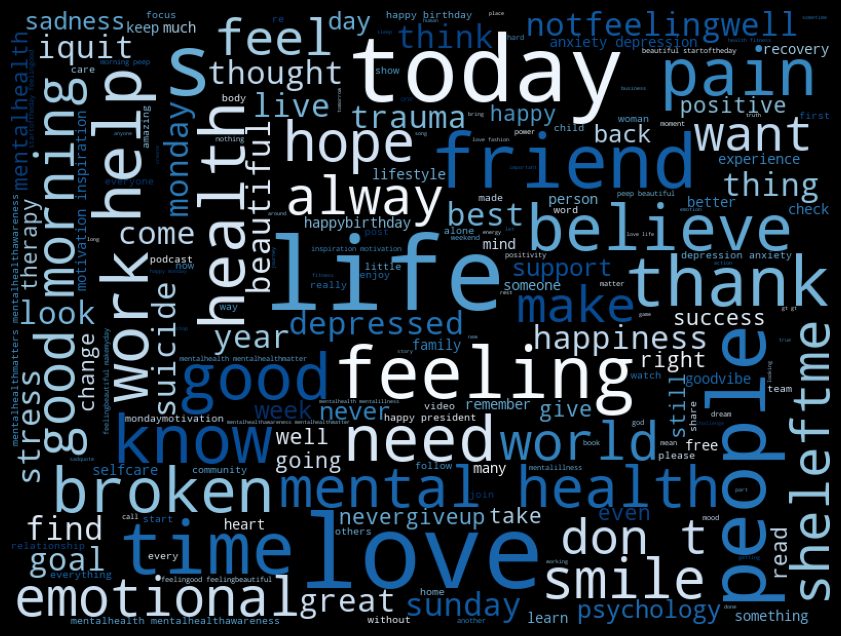

In [13]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

wordcloud = WordCloud(width=800, height=600, max_font_size=100, colormap="Blues").generate(all_words)

# plot the graph
plt.figure(figsize=(15,8), facecolor = 'k')
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis('off')
plt.show()

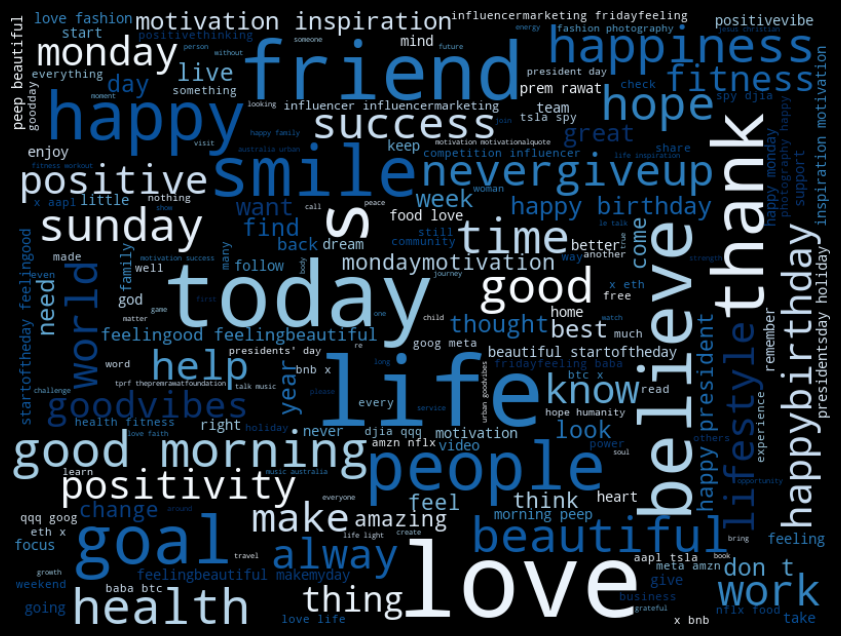

In [14]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=600, max_font_size=100, colormap="Blues").generate(all_words)

# plot the graph
plt.figure(figsize=(15,8), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

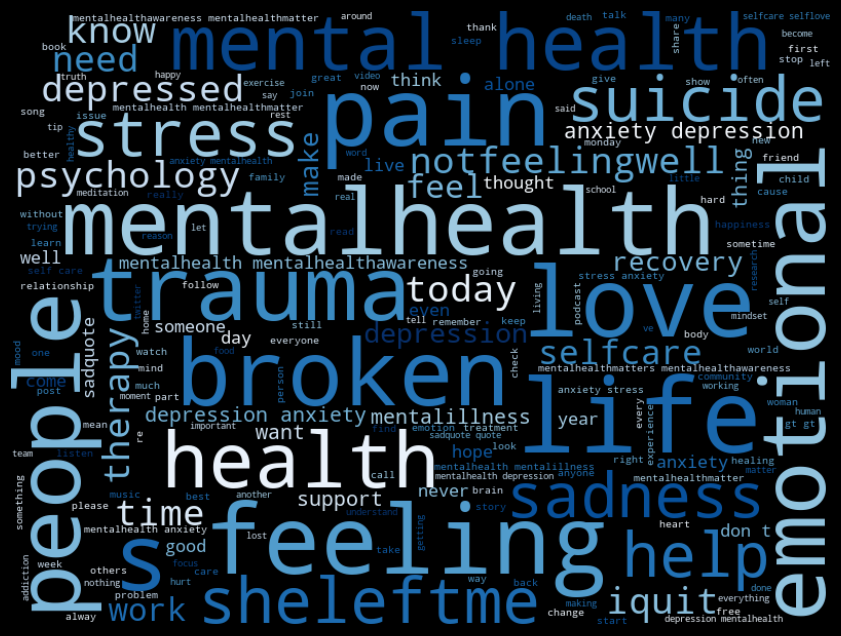

In [15]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=600, max_font_size=100, colormap="Blues").generate(all_words)

# plot the graph
plt.figure(figsize=(15,8), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from collections import Counter
p = Counter(" ".join(df['clean_tweet']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Words', 'Frequency'])
rslt

,Words,Frequency
0,love,6756
1,life,4886
2,health,4843
3,mentalhealth,4620
4,motivation,4295
5,happy,4131
6,good,3336
7,beautiful,3196
8,depression,3155
9,inspiration,3047


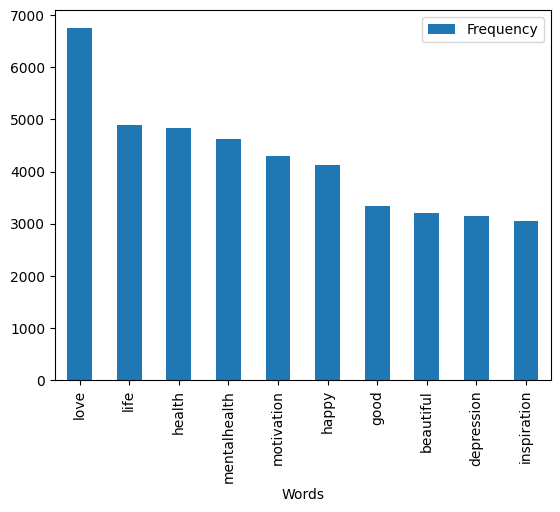

In [17]:
rslt.plot.bar(x="Words", y="Frequency")
plt.show()

## Feature Extraction

TFIDF Vectorizer:<br> 
TF = (Number of repetitions of word in a document) / (# of words in a document) <br>
IDF =Log[(# Number of documents) / (Number of documents containing the word)] and

In [18]:
#feature extraction 

vectorizer = TfidfVectorizer(use_idf=True, max_features=1000, stop_words='english')
bow = vectorizer.fit_transform(df['clean_tweet'])

In [19]:
'''
# to save vectorizer vocabulary to pickle file, will load this file for feature extracting of new data 

pickle.dump(vectorizer.vocabulary_, open('tfidf.pkl', 'wb')) 
'''

"\n# to save vectorizer vocabulary to pickle file, will load this file for feature extracting of new data \n\npickle.dump(vectorizer.vocabulary_, open('tfidf.pkl', 'wb')) \n"

## Input Split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.20)

## Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [22]:

# Model selection

model = LogisticRegression()

'''
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()  

#knn
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

#DT
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", random_state=0)

#random forest
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 10, criterion="entropy")

#svm
from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(kernel='linear', random_state=0) 
'''


'\nfrom sklearn.naive_bayes import GaussianNB  \nmodel = GaussianNB()  \n\n#knn\nfrom sklearn.neighbors import KNeighborsClassifier\nmodel= KNeighborsClassifier(n_neighbors=5, metric=\'minkowski\', p=2 )\n\n#DT\nfrom sklearn.tree import DecisionTreeClassifier\nmodel = DecisionTreeClassifier(criterion="entropy", random_state=0)\n\n#random forest\nfrom sklearn.ensemble import RandomForestClassifier  \nmodel= RandomForestClassifier(n_estimators= 10, criterion="entropy")\n\n#svm\nfrom sklearn.svm import SVC # "Support vector classifier"  \nmodel = SVC(kernel=\'linear\', random_state=0) \n'

In [23]:
# training the algorithem 
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
'''
#Save trained ML model to pickle file

#Save the model to file in the current working directory
with open("LG_model.pkl", 'wb') as file:  
    pickle.dump(model, file)
 

# Load the model from the saved file
with open("LG_model.pkl", 'rb') as file:  
    LR_model = pickle.load(file)



y_pred = LR_model.predict(x_test)
print(y_pred[:10])
print(y_test[:10].to_numpy())'''

'\n#Save trained ML model to pickle file\n\n#Save the model to file in the current working directory\nwith open("LG_model.pkl", \'wb\') as file:  \n    pickle.dump(model, file)\n \n\n# Load the model from the saved file\nwith open("LG_model.pkl", \'rb\') as file:  \n    LR_model = pickle.load(file)\n\n\n\ny_pred = LR_model.predict(x_test)\nprint(y_pred[:10])\nprint(y_test[:10].to_numpy())'

In [25]:
# testing
y_pred = model.predict(x_test)


In [26]:
print(y_pred[:10])              #predicted lables
print(y_test[:10].to_numpy())   #Actual lables

[1 0 1 0 0 0 0 0 0 1]
[1 0 1 0 0 0 0 0 1 1]


In [27]:
#performance score

#Precision Score = TP / (FP + TP)
print('Precision: %.3f' % precision_score(y_test, y_pred))

#Recall Score = TP / (FN + TP)
print('Recall: %.3f' % recall_score(y_test, y_pred))

#F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

#accuracy= TP+TN/TP+FP+TN+FN	
print('Accuracy: %.3f' %accuracy_score(y_test,y_pred))

Precision: 0.935
Recall: 0.928
F1 Score: 0.932
Accuracy: 0.941


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6865
           1       0.93      0.93      0.93      5159

    accuracy                           0.94     12024
   macro avg       0.94      0.94      0.94     12024
weighted avg       0.94      0.94      0.94     12024



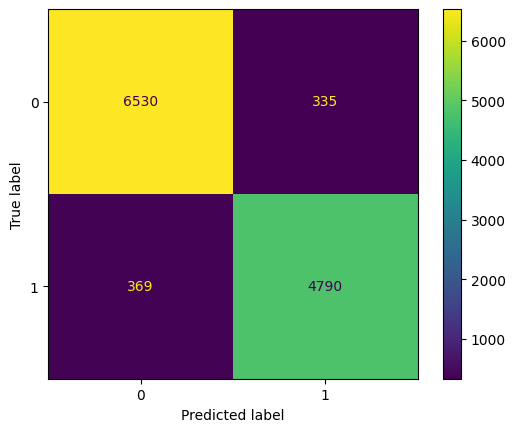

In [29]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)

cm_display.plot()
plt.show()


## User data prediction

In [30]:
#Reading collected sample data
udf = pd.read_csv('datasets/sample_user_tweets.csv')

In [31]:
# Data Cleaning: remove usernames, links, special characters, numbers and punctuations

udf['clean_tweet'] = udf['tweet'].apply(text_cliner)
udf['clean_tweet'] = udf['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
udf['clean_tweet'] = udf['clean_tweet'].apply(lambda x: " ".join([w for w in str(x).split() if len(w)>3]))


In [32]:
udf.info()
udf.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   100 non-null    int64 
 1   date         100 non-null    object
 2   id           100 non-null    object
 3   tweet        100 non-null    object
 4   clean_tweet  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


,Unnamed: 0,date,id,tweet,clean_tweet
0,0,2023-02-20 17:37:25+00:00,amangupta0303,This is a fraud that's taking place now online...,This fraud that's taking place online fake sel...
1,1,2023-02-20 17:37:24+00:00,amangupta0303,$ I used to feel nice when fakes came out offl...,used feel nice when fakes came offline like br...
2,2,2023-02-02 10:20:36+00:00,amangupta0303,I came accross this on Instagram. \n\nI always...,came accross this Instagram. always said:- App...
3,3,2023-01-26 06:30:25+00:00,amangupta0303,"The Indian growth story is phenomenal, and we ...","Indian growth story phenomenal, want contribut..."
4,4,2023-01-26 06:30:20+00:00,amangupta0303,"Today, with #HumBheeBanaLenge spirit, we take ...","Today, with HumBheeBanaLenge spirit, take grea..."
...,...,...,...,...,...
95,95,2022-01-04 08:28:49+00:00,amangupta0303,A recent learning I came across as a Shark of ...,recent learning came across Shark entrepreneur...
96,96,2022-01-01 08:20:22+00:00,amangupta0303,A very happy new year everyone. \nLet the hust...,very happy year everyone. hustle passion guide...
97,97,2021-12-27 08:58:31+00:00,amangupta0303,Aaj ka #SomvaarGyaan for budding entrepreneurs...,SomvaarGyaan budding entrepreneurs- Accept fac...
98,98,2021-12-26 08:00:17+00:00,amangupta0303,@RockWithboAt sailing stronger than ever,sailing stronger than ever


In [33]:
'''# Load vocabulary from trained vectorizer
tf1=pickle.load(open('tfidf.pkl', 'rb'))

tfnew=TfidfVectorizer(use_idf=True, stop_words = "english", max_features = 1000, vocabulary = tf1)
X_tf1 = tfnew.fit_transform(udf['clean_tweet'])
'''

'# Load vocabulary from trained vectorizer\ntf1=pickle.load(open(\'tfidf.pkl\', \'rb\'))\n\ntfnew=TfidfVectorizer(use_idf=True, stop_words = "english", max_features = 1000, vocabulary = tf1)\nX_tf1 = tfnew.fit_transform(udf[\'clean_tweet\'])\n'

In [34]:
#feature extraction from user data

ubow = vectorizer.transform(udf['clean_tweet'])

In [35]:
#prediction 
pred = model.predict(ubow)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [36]:
negatives=pred.tolist().count(1)
positives=pred.tolist().count(0)

if negatives > positives:
    print("User is depressed")

else:
    print("User is not depressed")

User is not depressed


In [37]:
negative_per=negatives*100/len(pred.tolist())
positive_per=positives*100/len(pred.tolist())
print(f"{negative_per}% Negative & {positive_per}% Positive")

38.0% Negative & 62.0% Positive
